# Trabajo Practico 3

<p style='text-align: justify;'>
    En el presente trabajo practico se utilizará la siguiente imagen:
</p>

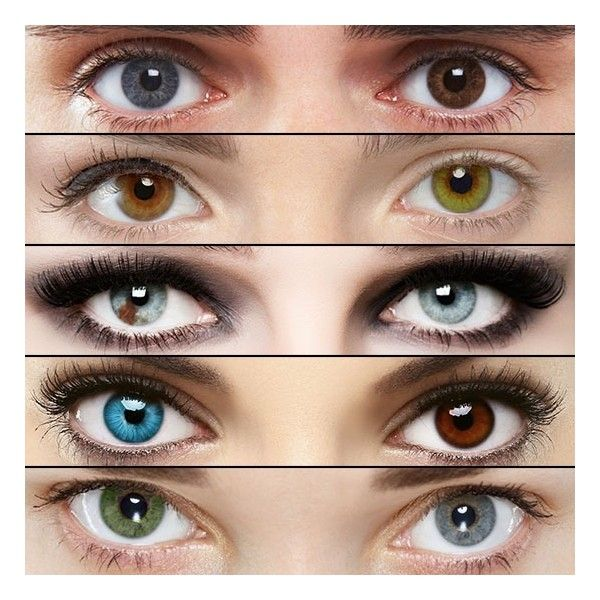

<p style='text-align: justify;'>
    Con el objetivo de:
    
   * Encontrar la posición de los iris en cada par de ojos y mida su distancia en píxeles.
   * Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en píxeles.   
</p>



In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [2]:
def show_img(img, RGB=True):
    if RGB:
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(img)
    else:
        img_out_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(img_out_RGB)
    return 

### Deteccion de Iris

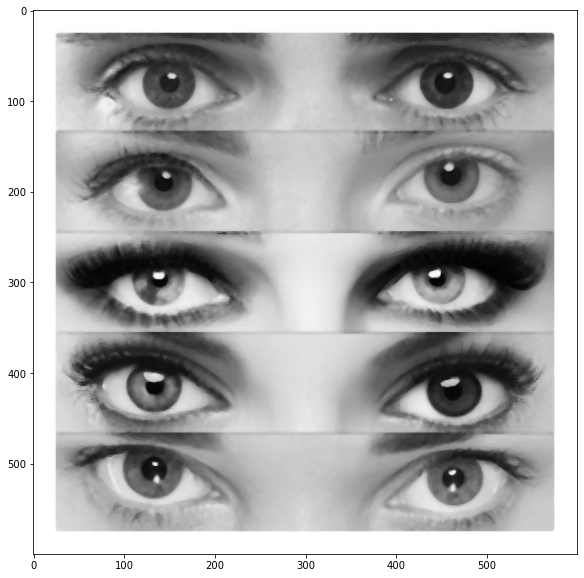

In [3]:
# Leemos la imagen
#=================

img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)

show_img(gray, RGB=False)
#cv.imshow('Ojos',gray)
#cv.waitKey(0)
#cv.destroyAllWindows()

Hacemos uso de la forma circular del iris y utilizamos la funcion de opencv, HoughCircles:

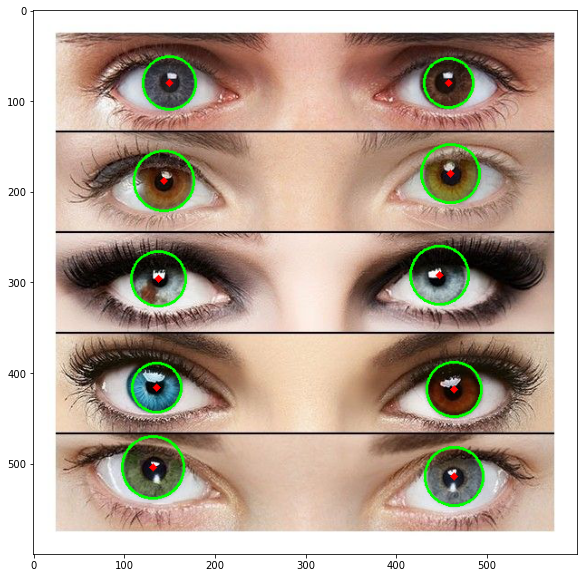

In [4]:
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================

img_iris = img.copy()
iris = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=5,param1=100,param2=40,minRadius=10,maxRadius=50)

iris = np.uint16(np.around(iris))

for i in iris[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_iris,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_iris,(i[0],i[1]),2,(0,0,255),3)

    
show_img(img_iris, RGB=False)

#cv.imshow('detected circles',img_iris)
#cv.waitKey(0)
#cv.destroyAllWindows()

In [5]:
print(iris)

[[[132 504  34]
  [464 514  32]
  [150  80  29]
  [144 188  33]
  [464 418  30]
  [460 180  32]
  [458  80  27]
  [138 296  30]
  [448 292  32]
  [136 416  27]]]


In [6]:
#Ordenos los circulos en orden ascendente segun su coordenada en el eje Y:
iris_detected = np.int32(iris[0,np.argsort(iris[0,:,1],axis=0)])
print(iris_detected)

x = np.arange(0,iris.shape[1],2)
dist_x = np.abs(iris_detected[x,0]-iris_detected[x+1,0])
dist_y = np.abs(iris_detected[x,1]-iris_detected[x+1,1])

for i in range(x.shape[0]):
    print(f"\nEl par de ojos {i}, esta distanciado por {dist_x[i]} pixeles en la coordenada X y por {dist_y[i]} pixeles en las coordenadas Y.")
    print(f"Distancia {np.int32(np.sqrt(dist_x[i]**2+dist_y[i]**2))}")

[[150  80  29]
 [458  80  27]
 [460 180  32]
 [144 188  33]
 [448 292  32]
 [138 296  30]
 [136 416  27]
 [464 418  30]
 [132 504  34]
 [464 514  32]]

El par de ojos 0, esta distanciado por 308 pixeles en la coordenada X y por 0 pixeles en las coordenadas Y.
Distancia 308

El par de ojos 1, esta distanciado por 316 pixeles en la coordenada X y por 8 pixeles en las coordenadas Y.
Distancia 316

El par de ojos 2, esta distanciado por 310 pixeles en la coordenada X y por 4 pixeles en las coordenadas Y.
Distancia 310

El par de ojos 3, esta distanciado por 328 pixeles en la coordenada X y por 2 pixeles en las coordenadas Y.
Distancia 328

El par de ojos 4, esta distanciado por 332 pixeles en la coordenada X y por 10 pixeles en las coordenadas Y.
Distancia 332


In [7]:
img_iris2 = img_iris.copy()
for i in range(x.shape[0]):
    cv.putText(img_iris2,f"Distancia {np.int32(np.sqrt(dist_x[i]**2+dist_y[i]**2))}",(np.abs(iris_detected[x[i],0]-iris_detected[x[i]+1,0])-75,iris_detected[x[i],1]-25),cv.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv.LINE_AA)

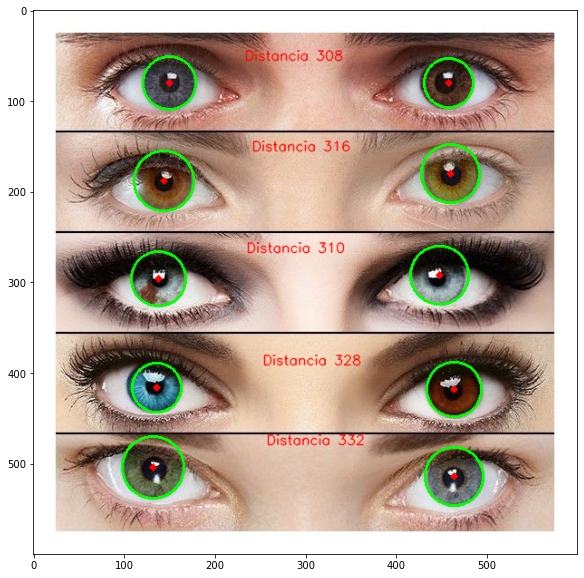

In [8]:
show_img(img_iris2, RGB=False)

### Deteccion de pupilas

Al igual que en la busqueda del iris, ajustaremos la funcion de Hough para hallar circulos para que esta vez detecte el iris.

In [9]:
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================

img_pupilas = img.copy()
pupilas = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1.5,minDist=14,param1=150,param2=28,minRadius=5,maxRadius=18)

pupilas = np.uint16(np.around(pupilas))

Ordenamos las detecciones segun la coordenada del eje Y:

In [10]:
pupilas_detected = np.int32(pupilas[0,np.argsort(pupilas[0,:,1],axis=0)])
print(pupilas_detected)

for i in pupilas[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_pupilas,(i[0],i[1]),i[2],(25,255,225),2)
    # Dibujamos el centro del círculo
    cv.circle(img_pupilas,(i[0],i[1]),2,(0,0,255),3)
show_img(img_pupilas, RGB=False)

[[151  80  10]
 [455  80  13]
 [ 79 104  10]
 [461 182  11]
 [143 190  10]
 [445 295   9]
 [139 295  10]
 [455 305  14]
 [100 307  14]
 [490 308  16]
 [103 335  10]
 [122 340   9]
 [ 53 391  11]
 [545 412  12]
 [136 413  12]
 [463 419  10]
 [133 505  14]
 [464 515  11]]


Se hace uso de la posicion detectada de los iris para descartar los falsos positivos, como podemos ver este algoritmo detectó figuras no buscadas, probablemente por picos espurios de intensidad de bordes.
Filtraremos los resultados, tomando como validos todas las detecciones que esten a una distancia menor de 13 pixeles con algun iris anteriormente detectado.

Se encontro pupila en [151  80  10], distancia al iris mas cercano 1.0
Se encontro pupila en [455  80  13], distancia al iris mas cercano 3.0
Se encontro pupila en [461 182  11], distancia al iris mas cercano 5.0
Se encontro pupila en [143 190  10], distancia al iris mas cercano 5.0
Se encontro pupila en [445 295   9], distancia al iris mas cercano 12.0
Se encontro pupila en [139 295  10], distancia al iris mas cercano 2.0
Se encontro pupila en [136 413  12], distancia al iris mas cercano 9.0
Se encontro pupila en [463 419  10], distancia al iris mas cercano 2.0
Se encontro pupila en [133 505  14], distancia al iris mas cercano 2.0
Se encontro pupila en [464 515  11], distancia al iris mas cercano 1.0


EN VERDE LAS DETECCIONES QUE SON CONSIDERADAS VALIDAS, EN AMARILLAS AQUELLAS QUE SE ELIMINAN


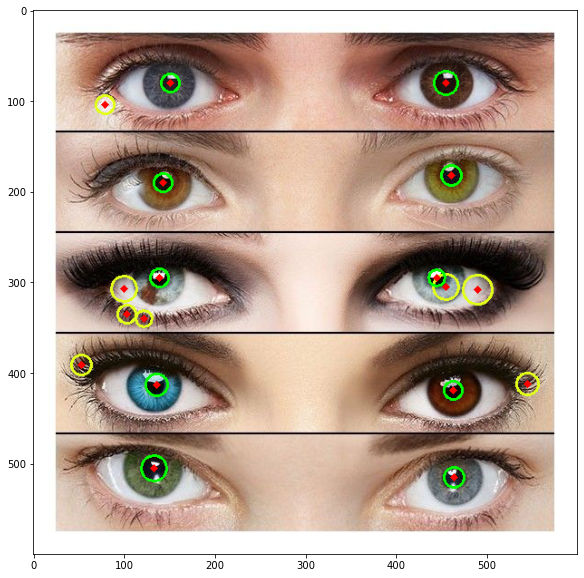

In [11]:
d_min = 13

pupilas_verify = np.zeros(iris_detected.shape)

j = 0
for i in range(pupilas.shape[1]):
    dist = np.sqrt((pupilas_detected[i,0]-iris_detected[:,0])**2)+((pupilas_detected[i,1]-iris_detected[:,1])**2)
    if (dist < d_min).any():
        print(f"Se encontro pupila en {pupilas_detected[i,:]}, distancia al iris mas cercano {dist.min()}")
        # Dibujamos el círculo externo
        cv.circle(img_pupilas,(pupilas_detected[i,0],pupilas_detected[i,1]),pupilas_detected[i,2],(0,255,0),2)
        # Dibujamos el centro del círculo
        cv.circle(img_pupilas,(pupilas_detected[i,0],pupilas_detected[i,1]),2,(0,0,255),3)
        pupilas_verify[j,:] = pupilas_detected[i,:]
        j += 1

print("\n\nEN VERDE LAS DETECCIONES QUE SON CONSIDERADAS VALIDAS, EN AMARILLAS AQUELLAS QUE SE ELIMINAN")
show_img(img_pupilas, RGB=False)        
        
#cv.imshow('detected circles',img_pupilas)
#cv.waitKey(0)
#cv.destroyAllWindows()

In [12]:
x_p = np.arange(0,iris.shape[1],2)
dist_x_p = np.abs(pupilas_verify[x_p,0]-pupilas_verify[x_p+1,0])
dist_y_p = np.abs(pupilas_verify[x_p,1]-pupilas_verify[x_p+1,1])

for i in range(x_p.shape[0]):
    print(f"\nEl par de pupilas {i}, esta distanciado por {dist_x_p[i]} pixeles en la coordenada X y por {dist_y_p[i]} pixeles en las coordenadas Y.")
    print(f"Distancia {np.int32(np.sqrt(dist_x_p[i]**2+dist_y_p[i]**2))}")


El par de pupilas 0, esta distanciado por 304.0 pixeles en la coordenada X y por 0.0 pixeles en las coordenadas Y.
Distancia 304

El par de pupilas 1, esta distanciado por 318.0 pixeles en la coordenada X y por 8.0 pixeles en las coordenadas Y.
Distancia 318

El par de pupilas 2, esta distanciado por 306.0 pixeles en la coordenada X y por 0.0 pixeles en las coordenadas Y.
Distancia 306

El par de pupilas 3, esta distanciado por 327.0 pixeles en la coordenada X y por 6.0 pixeles en las coordenadas Y.
Distancia 327

El par de pupilas 4, esta distanciado por 331.0 pixeles en la coordenada X y por 10.0 pixeles en las coordenadas Y.
Distancia 331


In [13]:
img_pupilas2 = img_pupilas.copy()

for i in range(x_p.shape[0]):
    cv.putText(img_pupilas2,f"Distancia: {np.int32(np.sqrt(dist_x_p[i]**2+dist_y_p[i]**2))}",(250,np.int32(pupilas_verify[x_p[i],1]-25)),cv.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv.LINE_AA)

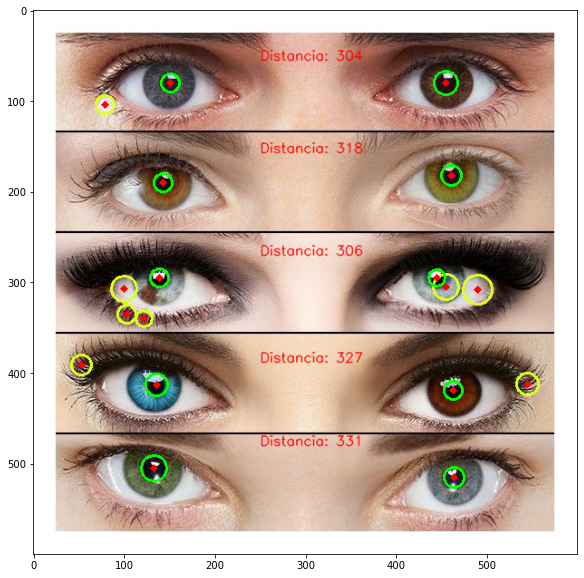

In [14]:
show_img(img_pupilas2, RGB=False)

Elementos detectados

In [15]:
img_out = img.copy()

iris_detected2 = np.int32(iris_detected)
pupilas_verify2 = np.int32(pupilas_verify)

for i in range(pupilas_verify.shape[0]):
    # Dibujamos el círculo externo
    cv.circle(img_out,(iris_detected2[i,0],iris_detected2[i,1]),iris_detected2[i,2],(255,0,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(iris_detected2[i,0],iris_detected2[i,1]),2,(255,0,255),3)
    # Dibujamos el círculo externo
    cv.circle(img_out,(pupilas_verify2[i,0],pupilas_verify2[i,1]),pupilas_verify2[i,2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(pupilas_verify2[i,0],pupilas_verify2[i,1]),2,(0,0,255),3)
    # circle(imagen,center,radius,color,ancho_linea,tipo_linea)

#cv.imshow('detected circles',img_out)
#cv.waitKey(0)
#cv.destroyAllWindows()

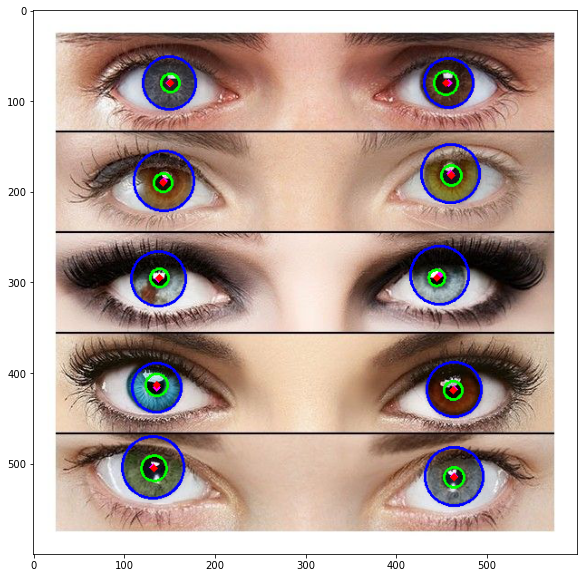

In [16]:
show_img(img_out, RGB=False)